### Importación de librerías

In [7]:
#librerías de manejo de datos
import numpy as np
import pandas as pd

#librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

#librería para codificar la variable de salida
from sklearn.preprocessing import LabelEncoder

#librería para separar los sets de train y test
from sklearn.model_selection import train_test_split

#ayuda a determinar las características que más influyen en la variable de salida
from sklearn.feature_selection import mutual_info_classif

#modelos de ensemble
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#importación de métricas de modelos de clasificación
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [8]:
#reescribo el nombre de las columnas para poder acceder a ellas más fácilmente
name_cols = {'Unnamed': 'unnamed',
        'id': 'id',
        'Gender': 'gender',
        'Customer Type': 'customer_type',
        'Age': 'age',
        'Type of Travel': 'type_travel',
        'Class': 'class',
        'Flight Distance': 'flight_distance',
        'Inflight wifi service': 'wifi_service',
        'Departure/Arrival time convenient': 'departure_arrival_time',
        'Ease of Online booking': 'online_booking',
        'Gate location': 'gate_location',
        'Food and drink': 'food_drink',
        'Online boarding': 'online_boarding',
        'Seat comfort': 'seat_comfort',
        'Inflight entertainment': 'entertain',
        'On-board service': 'onboard_service',
        'Leg room service': 'leg_service',
        'Baggage handling': 'bag_handle',
        'Checkin service': 'checkin_service',
        'Inflight service': 'inflight_service',
        'Cleanliness': 'cleanliness',
        'Departure Delay in Minutes': 'departure_delay',
        'Arrival Delay in Minutes': 'arrival_delay',
        'satisfaction': 'satisfaction'}

#formato lista para poder pasarlas como parámetro names
name_cols = list(name_cols.values())

#creación del dataframe
df = pd.read_csv('airline_passenger_satisfaction.csv', header = 0, names = name_cols)

### Exploración básica inicial

In [9]:
df.head()

,unnamed,id,gender,customer_type,age,type_travel,class,flight_distance,wifi_service,departure_arrival_time,...,entertain,onboard_service,leg_service,bag_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Parece que las columnas unnamed e id son números únicos sin información relevante.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unnamed                 103904 non-null  int64  
 1   id                      103904 non-null  int64  
 2   gender                  103904 non-null  object 
 3   customer_type           103904 non-null  object 
 4   age                     103904 non-null  int64  
 5   type_travel             103904 non-null  object 
 6   class                   103904 non-null  object 
 7   flight_distance         103904 non-null  int64  
 8   wifi_service            103904 non-null  int64  
 9   departure_arrival_time  103904 non-null  int64  
 10  online_booking          103904 non-null  int64  
 11  gate_location           103904 non-null  int64  
 12  food_drink              103904 non-null  int64  
 13  online_boarding         103904 non-null  int64  
 14  seat_comfort        

Hay 103 904 registros/filas y 25 columnas

In [11]:
#permite eliminar los registros duplicados.
df = df.drop_duplicates()

#verificamos si cambió el dataset original.
df.shape

(103904, 25)

Confirmamos que no hay duplicados en el dataset porque la forma permanece igual después de aplicar .drop_duplicates()

In [12]:
#exploramos la cantidad de nulos
df.isnull().sum()

unnamed                     0
id                          0
gender                      0
customer_type               0
age                         0
type_travel                 0
class                       0
flight_distance             0
wifi_service                0
departure_arrival_time      0
online_booking              0
gate_location               0
food_drink                  0
online_boarding             0
seat_comfort                0
entertain                   0
onboard_service             0
leg_service                 0
bag_handle                  0
checkin_service             0
inflight_service            0
cleanliness                 0
departure_delay             0
arrival_delay             310
satisfaction                0
dtype: int64

In [13]:
(310/103904)*100

0.29835232522328303

Hay muy pocos nulos en el dataset. Solamente en la columna arrival_delay. Al ser sólo un 0.29% del total de datos, podríamos plantearnos eliminar estos registros o imputarlos de una forma muy sencilla.

### Separación del dataset antes de continuar la exploración: train y test

In [14]:
#separación usando scikit learn train_test_split
train, test = train_test_split(df, test_size = 0.15, random_state = 42)

#creamos una copia de train
df_air = train.copy()

In [15]:
df_air.head()

,unnamed,id,gender,customer_type,age,type_travel,class,flight_distance,wifi_service,departure_arrival_time,...,entertain,onboard_service,leg_service,bag_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,satisfaction
70950,70950,106194,Female,Loyal Customer,28,Personal Travel,Eco,436,2,5,...,3,5,5,4,4,4,3,0,0.0,neutral or dissatisfied
16895,16895,39918,Male,Loyal Customer,48,Business travel,Eco,1086,5,1,...,5,4,5,1,3,1,5,0,3.0,satisfied
63160,63160,88519,Female,Loyal Customer,22,Personal Travel,Eco,250,2,5,...,3,5,4,4,5,5,3,0,0.0,neutral or dissatisfied
82186,82186,46825,Male,Loyal Customer,33,Business travel,Eco,819,4,2,...,4,2,4,2,3,3,4,0,15.0,satisfied
38074,38074,129600,Male,disloyal Customer,39,Business travel,Eco,447,2,2,...,3,4,3,4,3,3,3,0,0.0,neutral or dissatisfied


In [16]:
#comprobamos la forma del nuevo dataset de entrenamiento
df_air.shape

(88318, 25)

### Exploración básica de la variable de salida

<Axes: xlabel='satisfaction', ylabel='Count'>

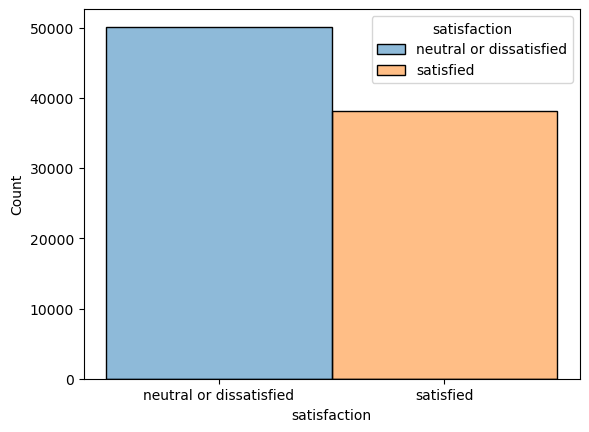

In [17]:
sns.histplot(data = df_air, x = 'satisfaction', hue = 'satisfaction')

Está relativamente bien balanceada. Esto es bueno.

### Preguntas de investigación

- ¿Qué relaciones hay entre las variables?: información mutua

La Información Mutua (Mutual Information en inglés) es una medida que se utiliza en estadísticas y teoría de la información para cuantificar la relación entre dos variables aleatorias. Representa la cantidad de información que comparten dos variables al revelar información sobre una variable dada la otra. La información mutua mide cómo el conocimiento de una variable afecta nuestra incertidumbre sobre la otra variable. Si la información mutua entre dos variables es alta, significa que conocer el valor de una variable nos proporciona una gran cantidad de información sobre el valor probable de la otra variable.

In [18]:
X = df_air.copy()
y = X.pop("satisfaction")

#transformacion temporal de las variables tipo object
for col_name in X.select_dtypes(["object"]):
    X[col_name],_ = X[col_name].factorize()

#rellena temporalmente el valor de las columnas vacias con el valor promedio de las demas 
X = X.apply(lambda x: x.fillna(x.mean())).astype(int)
features = X.dtypes == int

def MakeMiScore(X,y,disc_features):
    mi_scores = mutual_info_classif(X,y, discrete_features=disc_features)
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

print(MakeMiScore(X,y,features))

unnamed                   0.683950
id                        0.683950
online_boarding           0.212000
wifi_service              0.161906
class                     0.134621
type_travel               0.113472
entertain                 0.092960
flight_distance           0.084985
seat_comfort              0.078346
leg_service               0.060422
onboard_service           0.056654
cleanliness               0.051409
online_booking            0.051408
age                       0.046141
bag_handle                0.042435
inflight_service          0.041004
checkin_service           0.031738
food_drink                0.026513
customer_type             0.018383
gate_location             0.012469
arrival_delay             0.009234
departure_delay           0.005796
departure_arrival_time    0.002088
gender                    0.000086
Name: MI Scores, dtype: float64


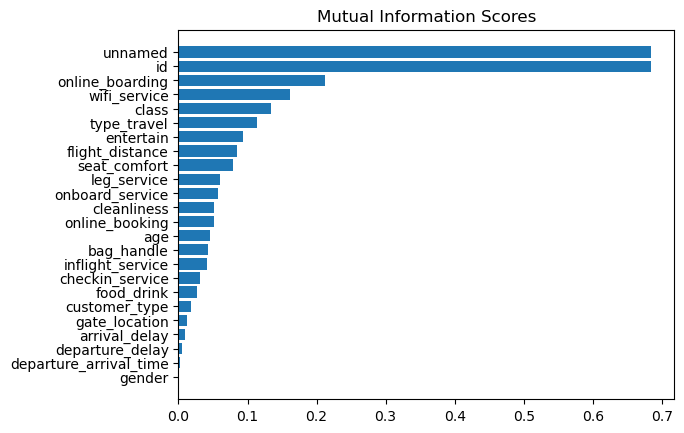

In [19]:
def PlotScores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

PlotScores(MakeMiScore(X,y,features))

- ¿Cuántos niveles hay de las variables categóricas? ¿Están bien balanceados los niveles?

In [20]:
cat = ['gender', 'customer_type', 'type_travel', 'class']

for col in cat:
    print(f"Column name: {col}")
    print(df_air[col].value_counts())
    print()

Column name: gender
gender
Female    44799
Male      43519
Name: count, dtype: int64

Column name: customer_type
customer_type
Loyal Customer       72130
disloyal Customer    16188
Name: count, dtype: int64

Column name: type_travel
type_travel
Business travel    60837
Personal Travel    27481
Name: count, dtype: int64

Column name: class
class
Business    42056
Eco         39891
Eco Plus     6371
Name: count, dtype: int64



gender -> balanceada

customer_type -> un poco desbalanceada

type_travel -> un poco desbalanceada

class -> el nivel Eco Plus está desbalanceado

- ¿Cómo se comporta la variable de salida respecto a las categóricas?

Column name: gender


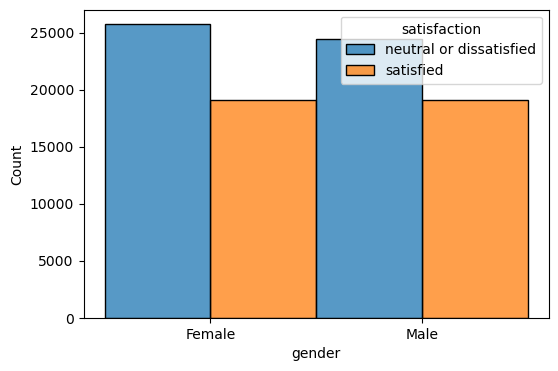


Column name: customer_type


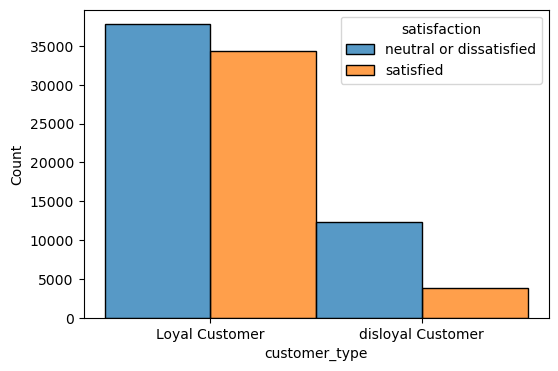


Column name: type_travel


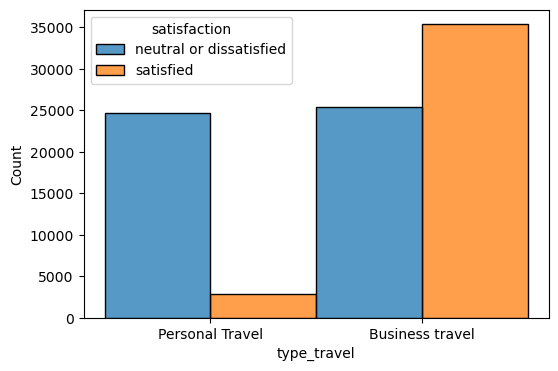


Column name: class


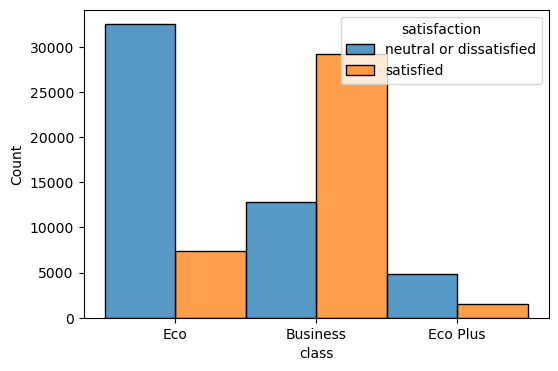

In [21]:
for col in cat:
    print(f"Column name: {col}")
    plt.figure(figsize = (6, 4))
    plt.subplot(111)
    sns.histplot(data = df_air, x = df_air[col], hue = 'satisfaction', multiple = 'dodge', binwidth = 0.5)
    plt.show()
    print()

gender -> parece que no influye en la 'satisfaction'. El comportamiento de 'satisfaction' es igual para 'male' que para 'female'

customer_type -> pareciera que los 'disloyal Customer' estuvieran más insatisfechos, aunque ¿es posible que sea porque la variable está desbalanceada?

type_travel -> se ve una clara diferencia en esta variable. Los que viajan por 'Business' parecen más satisfechos.

class -> se ve también una clara diferencia. Los de 'Business class' están más satisfechos.

In [22]:
df_air.groupby('type_travel')['class'].value_counts()

type_travel      class   
Business travel  Business    40256
                 Eco         17293
                 Eco Plus     3288
Personal Travel  Eco         22598
                 Eco Plus     3083
                 Business     1800
Name: count, dtype: int64

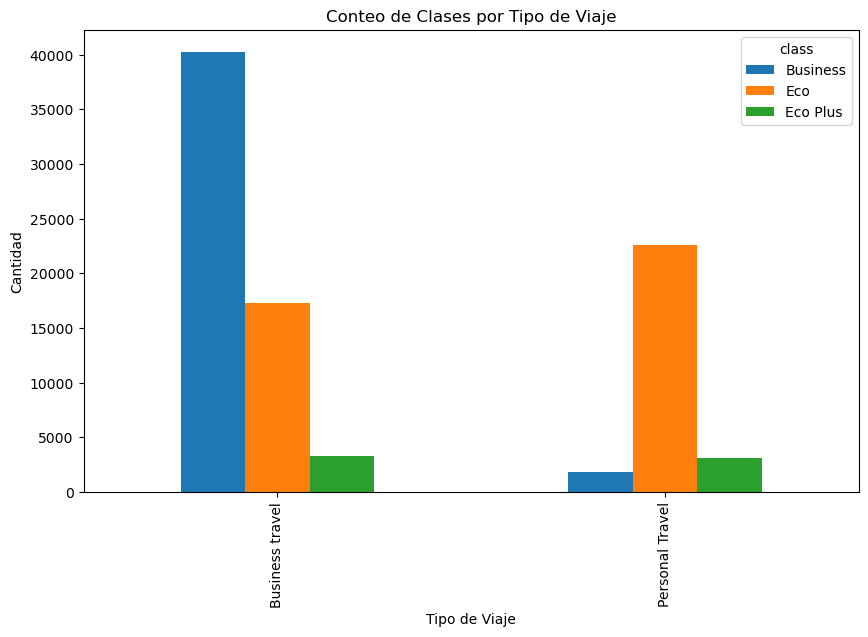

In [23]:
#realiza el groupby y cuenta los valores
count_values = df_air.groupby(['type_travel', 'class']).size().unstack()

#crea un gráfico de barras
count_values.plot(kind ='bar', stacked = False, figsize = (10, 6))

#configura las etiquetas y el título del gráfico
plt.xlabel('Tipo de Viaje')
plt.ylabel('Cantidad')
plt.title('Conteo de Clases por Tipo de Viaje')

#muestra el gráfico
plt.show()

En la gráfica se ve claramente que las personas que viajan por Business van principalemente en clase Business (lo que puede parecer obvio) y que las personas que viajan por motivos personales viajan en Eco.

- ¿Cómo responde la variable de salida ante las variables numéricas?

In [24]:
df.describe()

,unnamed,id,age,flight_distance,wifi_service,departure_arrival_time,online_booking,gate_location,food_drink,online_boarding,seat_comfort,entertain,onboard_service,leg_service,bag_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Parece que hay algunas variables que son calificaciones que probablemente vayan de 0 a 5. Investigaremos primero estás "calificaciones" y después miraremos las demás variables numéricas.

In [25]:
numeric_calif = ['wifi_service', 'departure_arrival_time', 'online_booking', 'gate_location', 'food_drink', 
        'online_boarding', 'seat_comfort', 'entertain', 'onboard_service', 'leg_service', 'bag_handle',
        'checkin_service', 'inflight_service', 'cleanliness']

numeric_notcalif = ['age', 'flight_distance', 'departure_delay', 'arrival_delay']

Column name: wifi_service


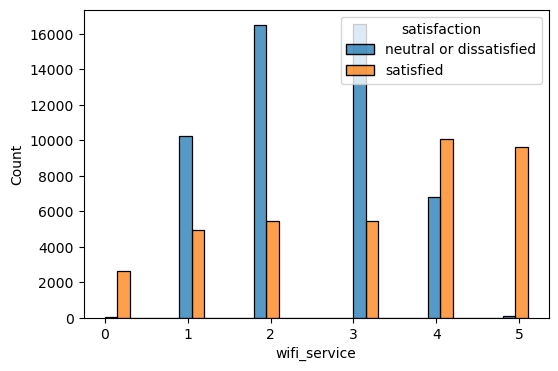


Column name: departure_arrival_time


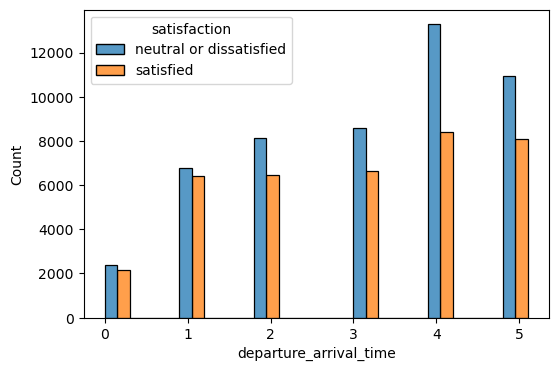


Column name: online_booking


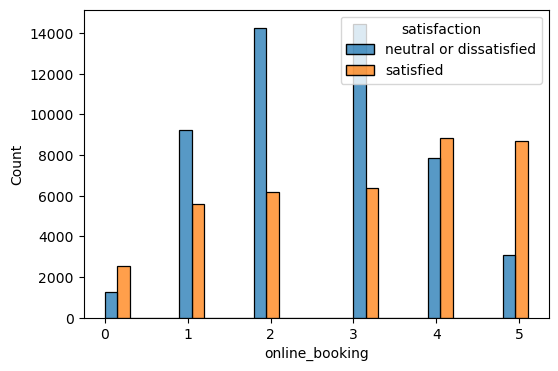


Column name: gate_location


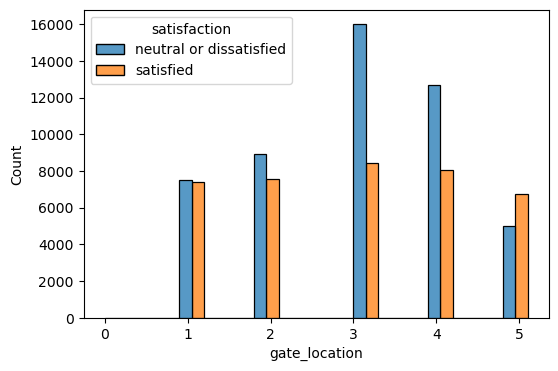


Column name: food_drink


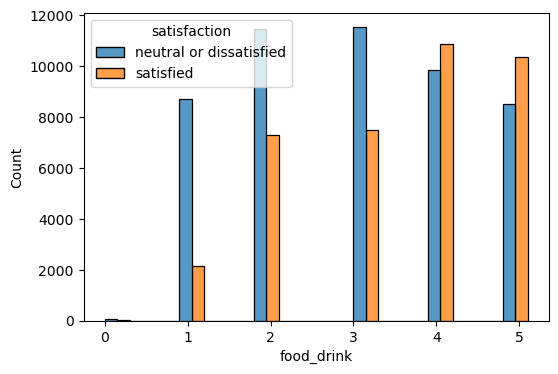


Column name: online_boarding


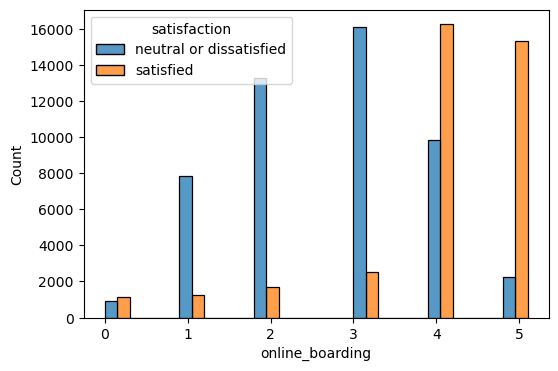


Column name: seat_comfort


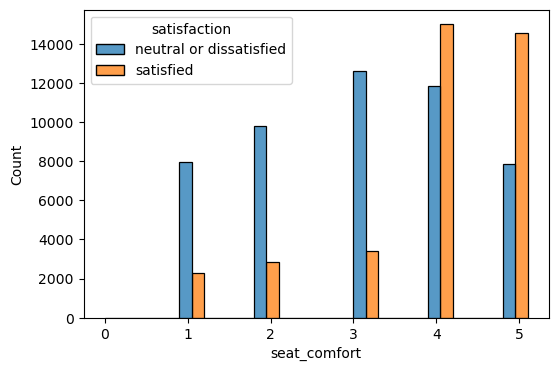


Column name: entertain


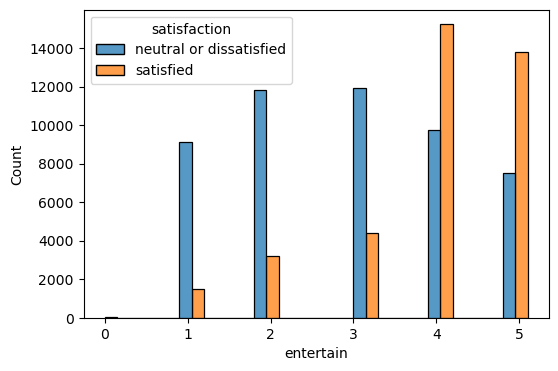


Column name: onboard_service


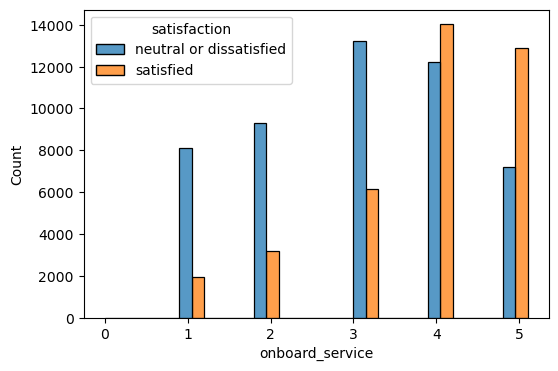


Column name: leg_service


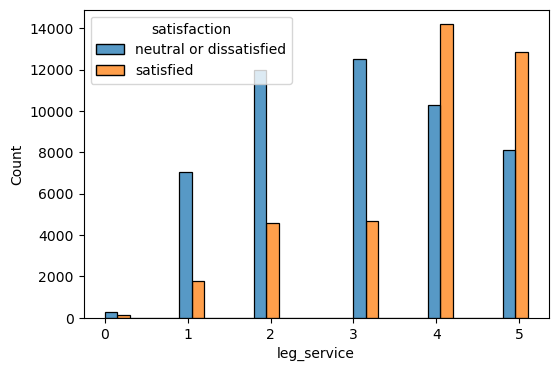


Column name: bag_handle


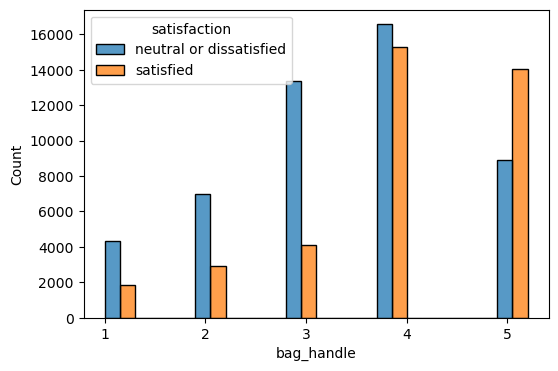


Column name: checkin_service


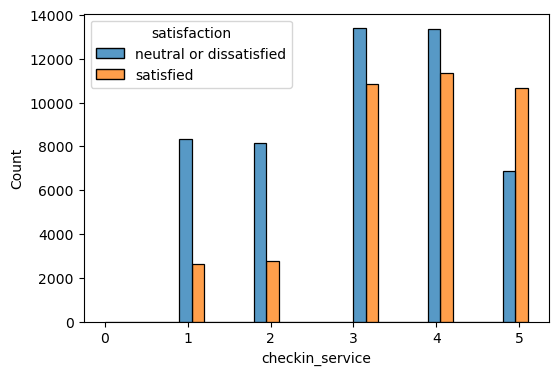


Column name: inflight_service


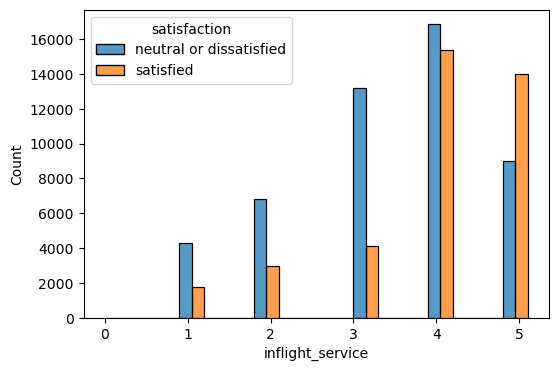


Column name: cleanliness


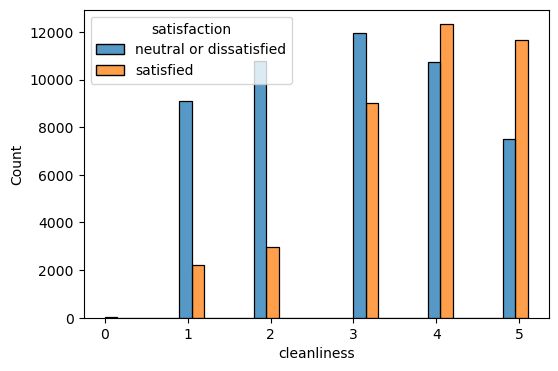

In [26]:
for col in numeric_calif:
    print(f"Column name: {col}")
    plt.figure(figsize = (6, 4))
    plt.subplot(111)
    sns.histplot(data = df_air, x = df_air[col], hue = 'satisfaction', multiple = 'dodge', binwidth = 0.3)
    plt.show()
    print()

Se podría "esperar" (simplificando mucho la realidad) que las barras de satisfacción fueran aumentando con la calificación (barras de satisfacción más altas en 4 - 5) y que las barras de instatisfacción fueran disminuyendo a medida que aumenta la calificación...Sin embargo, miremos más de cerca lo que puede estar pasando en cada una:

'wifi_service' -> 

'departure_arrival_time' ->

'online_booking' ->

'gate_location' ->

'food_drink' ->

'online_boarding' ->

'seat_comfort' ->

'entertain' ->

'onboard_service' ->

'leg_service' ->

'bag_handle' ->

 'checkin_service' ->

'inflight_service' ->

'cleanliness' ->

- Función para Matriz de Correlación

In [27]:
def printcorr(df = df):
    corr = df.corr()
    
    # Set up the matplotlib plot configuration
    f, ax = plt.subplots(figsize=(25, 20))
    
    # Generate a mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype = bool))
    
    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap = True)

    # Draw the heatmap
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap, vmin=-1, vmax=1)

- ¿Qué tanta relación hay entre las variables numéricas que parecen ser calificaciones?

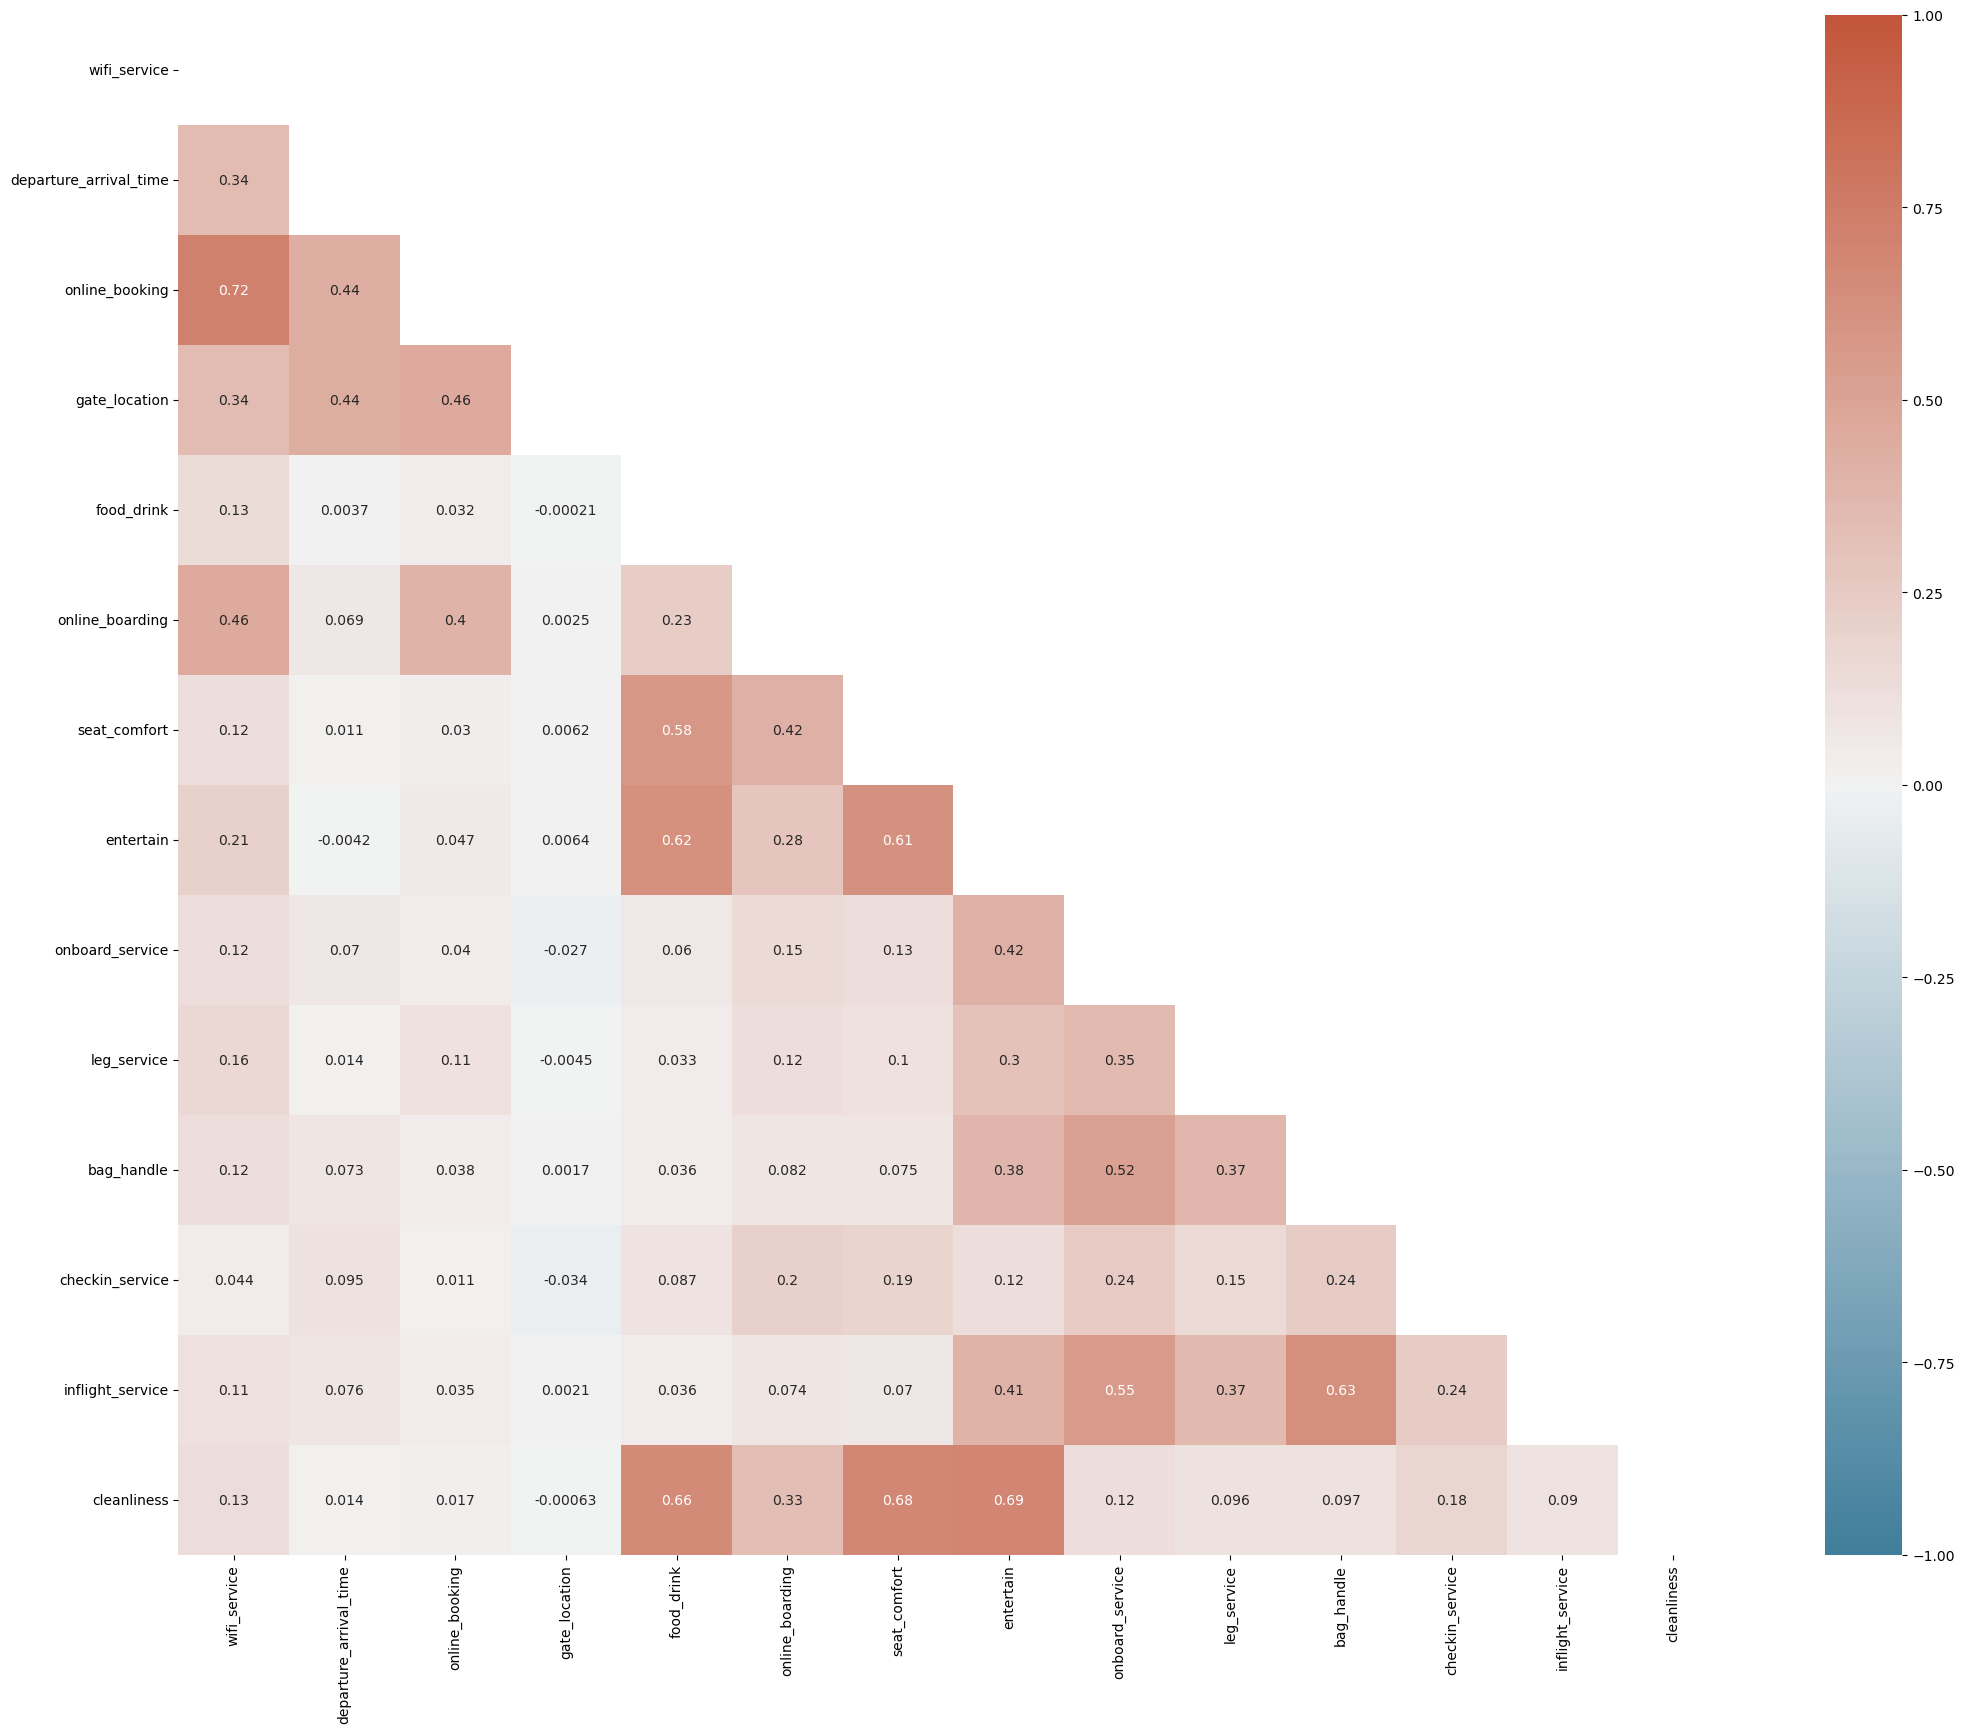

In [28]:
df_numeric_calif = df_air[numeric_calif]
printcorr(df_numeric_calif)

Hay algunas variables que se relacionan bastante entre sí como por ejemplo 'online booking' y 'wifi service' con una correlación de 0.72. Por ahora las dejaremos. Luego podríamos explorar si hay colinealidad.

Hacer algun promedio o suma de algunas calificaciones que tengan mucha relación entre sí o separarlas por categorías y sumarlas/promediar.

- ¿Cómo se relacionan las variables numéricas que no son calificaciones con la satisfacción?

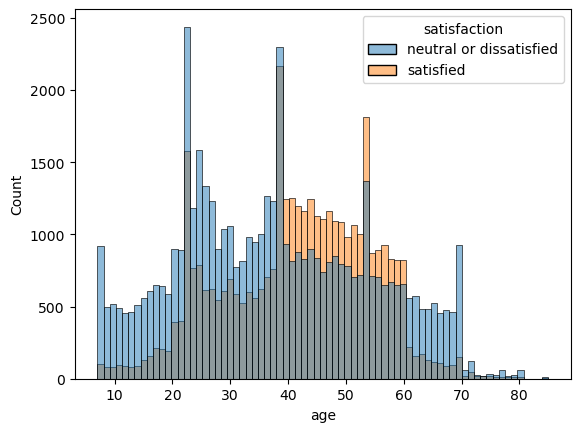

In [29]:
sns.histplot(data = df_air, x = 'age', hue = 'satisfaction');

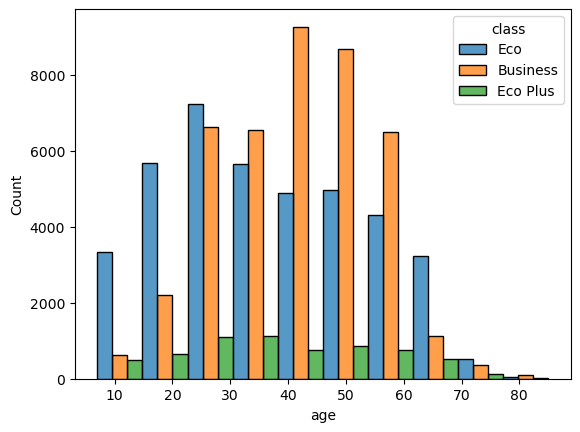

In [30]:
sns.histplot(data = df_air, x = 'age', hue = 'class', bins = 10, multiple = 'dodge');

Vemos que entre más o menos los 35 y los 60 años las personas viajan más en Business que en Eco y en Eco Plus.

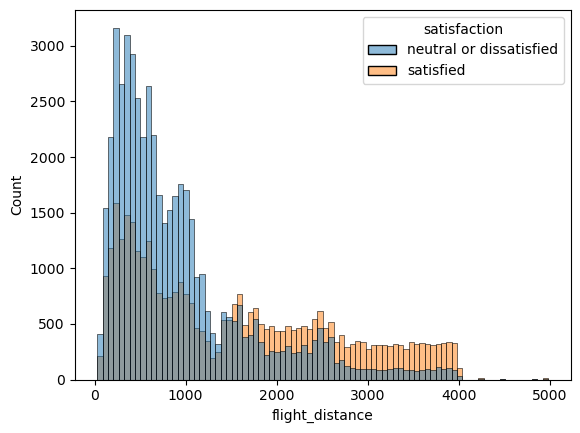

In [31]:
sns.histplot(data = df_air, x = 'flight_distance', hue = 'satisfaction');

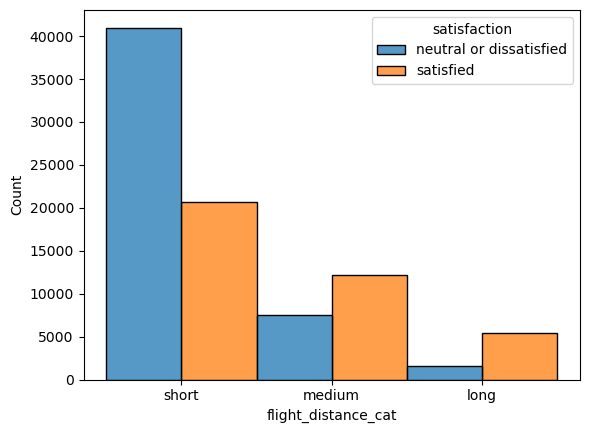

In [32]:
df_air_transformed = df_air.copy()

def categorize_distance(x):
    if x <= 1500:
        return 'short'
    elif 1500 < x <= 3000:
        return 'medium'
    else:
        return 'long'

df_air_transformed['flight_distance_cat'] = df_air_transformed.flight_distance.apply(categorize_distance)

sns.histplot(data = df_air_transformed, x = 'flight_distance_cat', hue = 'satisfaction', multiple = 'dodge');

Parece que hay mayor grado de satisfacción en los vuelos medios y largos.

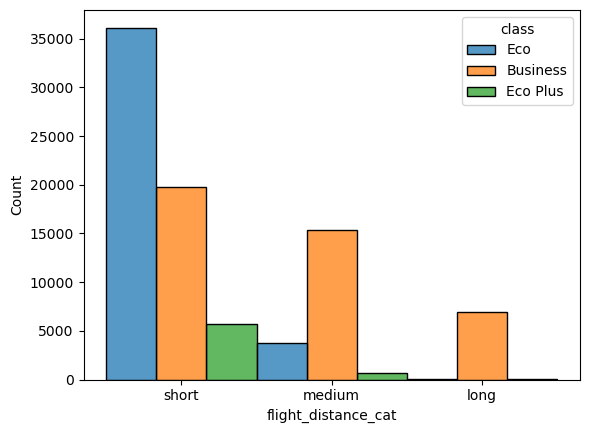

In [33]:
sns.histplot(data = df_air_transformed, x = 'flight_distance_cat', hue = 'class', multiple = 'dodge');

Parece que en los vuelos medios y largos las personas optan más por viajar en Business que en Eco. En los vuelos cortos, las personas tienden más a viajar en Eco.

<Axes: xlabel='age', ylabel='Count'>

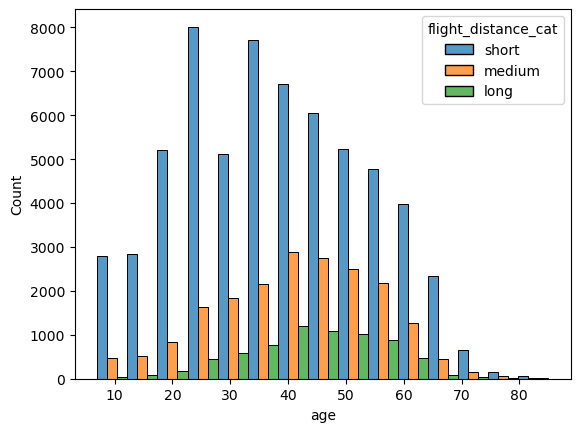

In [34]:
sns.histplot(data = df_air_transformed, x = 'age', hue = 'flight_distance_cat', multiple = 'dodge', bins = 15)

In [35]:
df_air_transformed.flight_distance_cat.value_counts()

flight_distance_cat
short     61615
medium    19733
long       6970
Name: count, dtype: int64

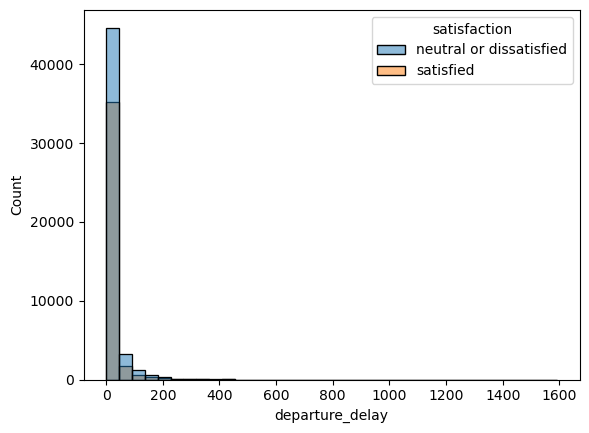

In [36]:
sns.histplot(data = df_air_transformed, x = 'departure_delay', hue = 'satisfaction', bins = 35);

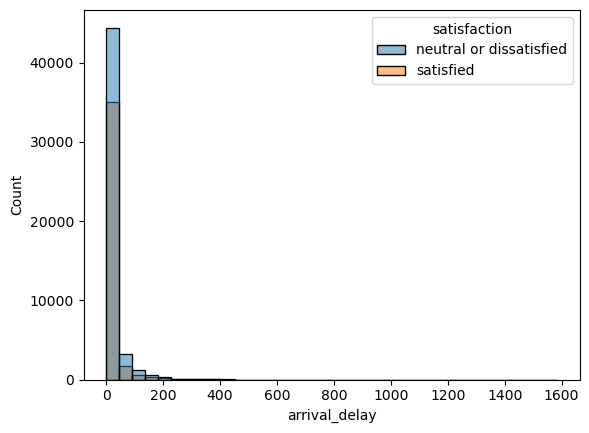

In [37]:
sns.histplot(data = df_air_transformed, x = 'arrival_delay', hue = 'satisfaction', bins = 35);

¿Habrá colinealidad entre 'departure_delay' y 'arrival_delay'?

In [39]:
printcorr(df_air_transformed)

ValueError: could not convert string to float: 'Female'

Sí! hay colinealidad entre departure y arrival delay. Lo cual tiene mucho sentido. Eliminaremos una de las columnas para alimentar al modelo. Primero intentaremos eliminar departure e imputar nulos de arrival y luego podemos intentar eliminar la columna de arrival entera.

### Imputación de nulos

In [ ]:
df_air_transformed.arrival_delay.isnull().sum()

265

In [ ]:
df_air_transformed.dropna(axis = 0, inplace = True)
df_air_transformed.arrival_delay.isnull().sum()

0

In [ ]:
#imputación con KNN. NO tener en cuenta la variable target
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors = 10)

#cols_to_knn = ['arrival_delay']

#df_air_transformed[cols_to_knn] = imputer.fit_transform(df_air_transformed[cols_to_knn])

#df_air_transformed.isnull().sum()

### Ingeniería de características

### Transformer (CustomTransformer)

In [ ]:
col_to_drop = ['unnamed', 'id', 'departure_delay', 'flight_distance']
df_air_transformed = df_air_transformed.drop(columns = col_to_drop)
df_air_transformed.head()

,gender,customer_type,age,type_travel,class,wifi_service,departure_arrival_time,online_booking,gate_location,food_drink,...,entertain,onboard_service,leg_service,bag_handle,checkin_service,inflight_service,cleanliness,arrival_delay,satisfaction,flight_distance_cat
70950,Female,Loyal Customer,28,Personal Travel,Eco,2,5,2,2,3,...,3,5,5,4,4,4,3,0.0,neutral or dissatisfied,short
16895,Male,Loyal Customer,48,Business travel,Eco,5,1,1,1,5,...,5,4,5,1,3,1,5,3.0,satisfied,short
63160,Female,Loyal Customer,22,Personal Travel,Eco,2,5,2,2,3,...,3,5,4,4,5,5,3,0.0,neutral or dissatisfied,short
82186,Male,Loyal Customer,33,Business travel,Eco,4,2,4,4,4,...,4,2,4,2,3,3,4,15.0,satisfied,short
38074,Male,disloyal Customer,39,Business travel,Eco,2,2,2,3,3,...,3,4,3,4,3,3,3,0.0,neutral or dissatisfied,short


In [ ]:
df_air_transformed.shape

(88053, 22)

### Numéricas: MinMaxScaler / Categóricas: OneHotEncoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

numeric = ['wifi_service', 'departure_arrival_time', 'online_booking', 'gate_location', 'food_drink', 
        'online_boarding', 'seat_comfort', 'entertain', 'onboard_service', 'leg_service', 'bag_handle',
        'checkin_service', 'inflight_service', 'cleanliness','age', 'arrival_delay']

cat = ['gender', 'customer_type', 'type_travel', 'class', 'flight_distance_cat']

trans_cat = ('CatTrans', OneHotEncoder(drop = 'first'), cat)
trans_num = ('NumTrans', MinMaxScaler(), numeric)

transformer = ColumnTransformer([trans_cat, trans_num], remainder = "passthrough")

Podemos probar el one hot encoder con drop = 'first'

### Separación de X - y del set de train

In [ ]:
X_train = df_air_transformed.drop(['satisfaction'], axis = 1)
y_train = df_air_transformed.satisfaction

In [ ]:
X_train = transformer.fit_transform(X_train)
X_train

array([[0.        , 0.        , 1.        , ..., 0.6       , 0.26923077,
        0.        ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.52564103,
        0.00189394],
       [0.        , 0.        , 1.        , ..., 0.6       , 0.19230769,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.2       , 0.5       ,
        0.16603535],
       [0.        , 0.        , 0.        , ..., 1.        , 0.38461538,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.8       , 0.08974359,
        0.        ]])

In [ ]:
transformer.get_feature_names_out()

X_train = pd.DataFrame(data = X_train, columns = transformer.get_feature_names_out()) 

X_train

,CatTrans__gender_Male,CatTrans__customer_type_disloyal Customer,CatTrans__type_travel_Personal Travel,CatTrans__class_Eco,CatTrans__class_Eco Plus,CatTrans__flight_distance_cat_medium,CatTrans__flight_distance_cat_short,NumTrans__wifi_service,NumTrans__departure_arrival_time,NumTrans__online_booking,...,NumTrans__seat_comfort,NumTrans__entertain,NumTrans__onboard_service,NumTrans__leg_service,NumTrans__bag_handle,NumTrans__checkin_service,NumTrans__inflight_service,NumTrans__cleanliness,NumTrans__age,NumTrans__arrival_delay
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.4,1.0,0.4,...,0.6,0.6,1.0,1.0,0.75,0.8,0.8,0.6,0.269231,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.2,0.2,...,1.0,1.0,0.8,1.0,0.00,0.6,0.2,1.0,0.525641,0.001894
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.4,1.0,0.4,...,0.6,0.6,1.0,0.8,0.75,1.0,1.0,0.6,0.192308,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.8,0.4,0.8,...,0.8,0.8,0.4,0.8,0.25,0.6,0.6,0.8,0.333333,0.009470
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.4,0.4,0.4,...,0.6,0.6,0.8,0.6,0.75,0.6,0.6,0.6,0.410256,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88048,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.6,1.0,0.6,...,0.6,0.6,0.8,0.6,0.25,0.6,0.4,0.6,0.410256,0.000000
88049,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.6,0.8,0.6,...,0.4,0.6,1.0,0.2,0.25,0.8,0.8,0.6,0.128205,0.001263
88050,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.2,0.4,0.4,...,0.2,0.8,0.6,0.6,0.50,0.2,0.2,0.2,0.500000,0.166035
88051,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.2,0.4,0.75,0.2,0.6,1.0,0.384615,0.000000


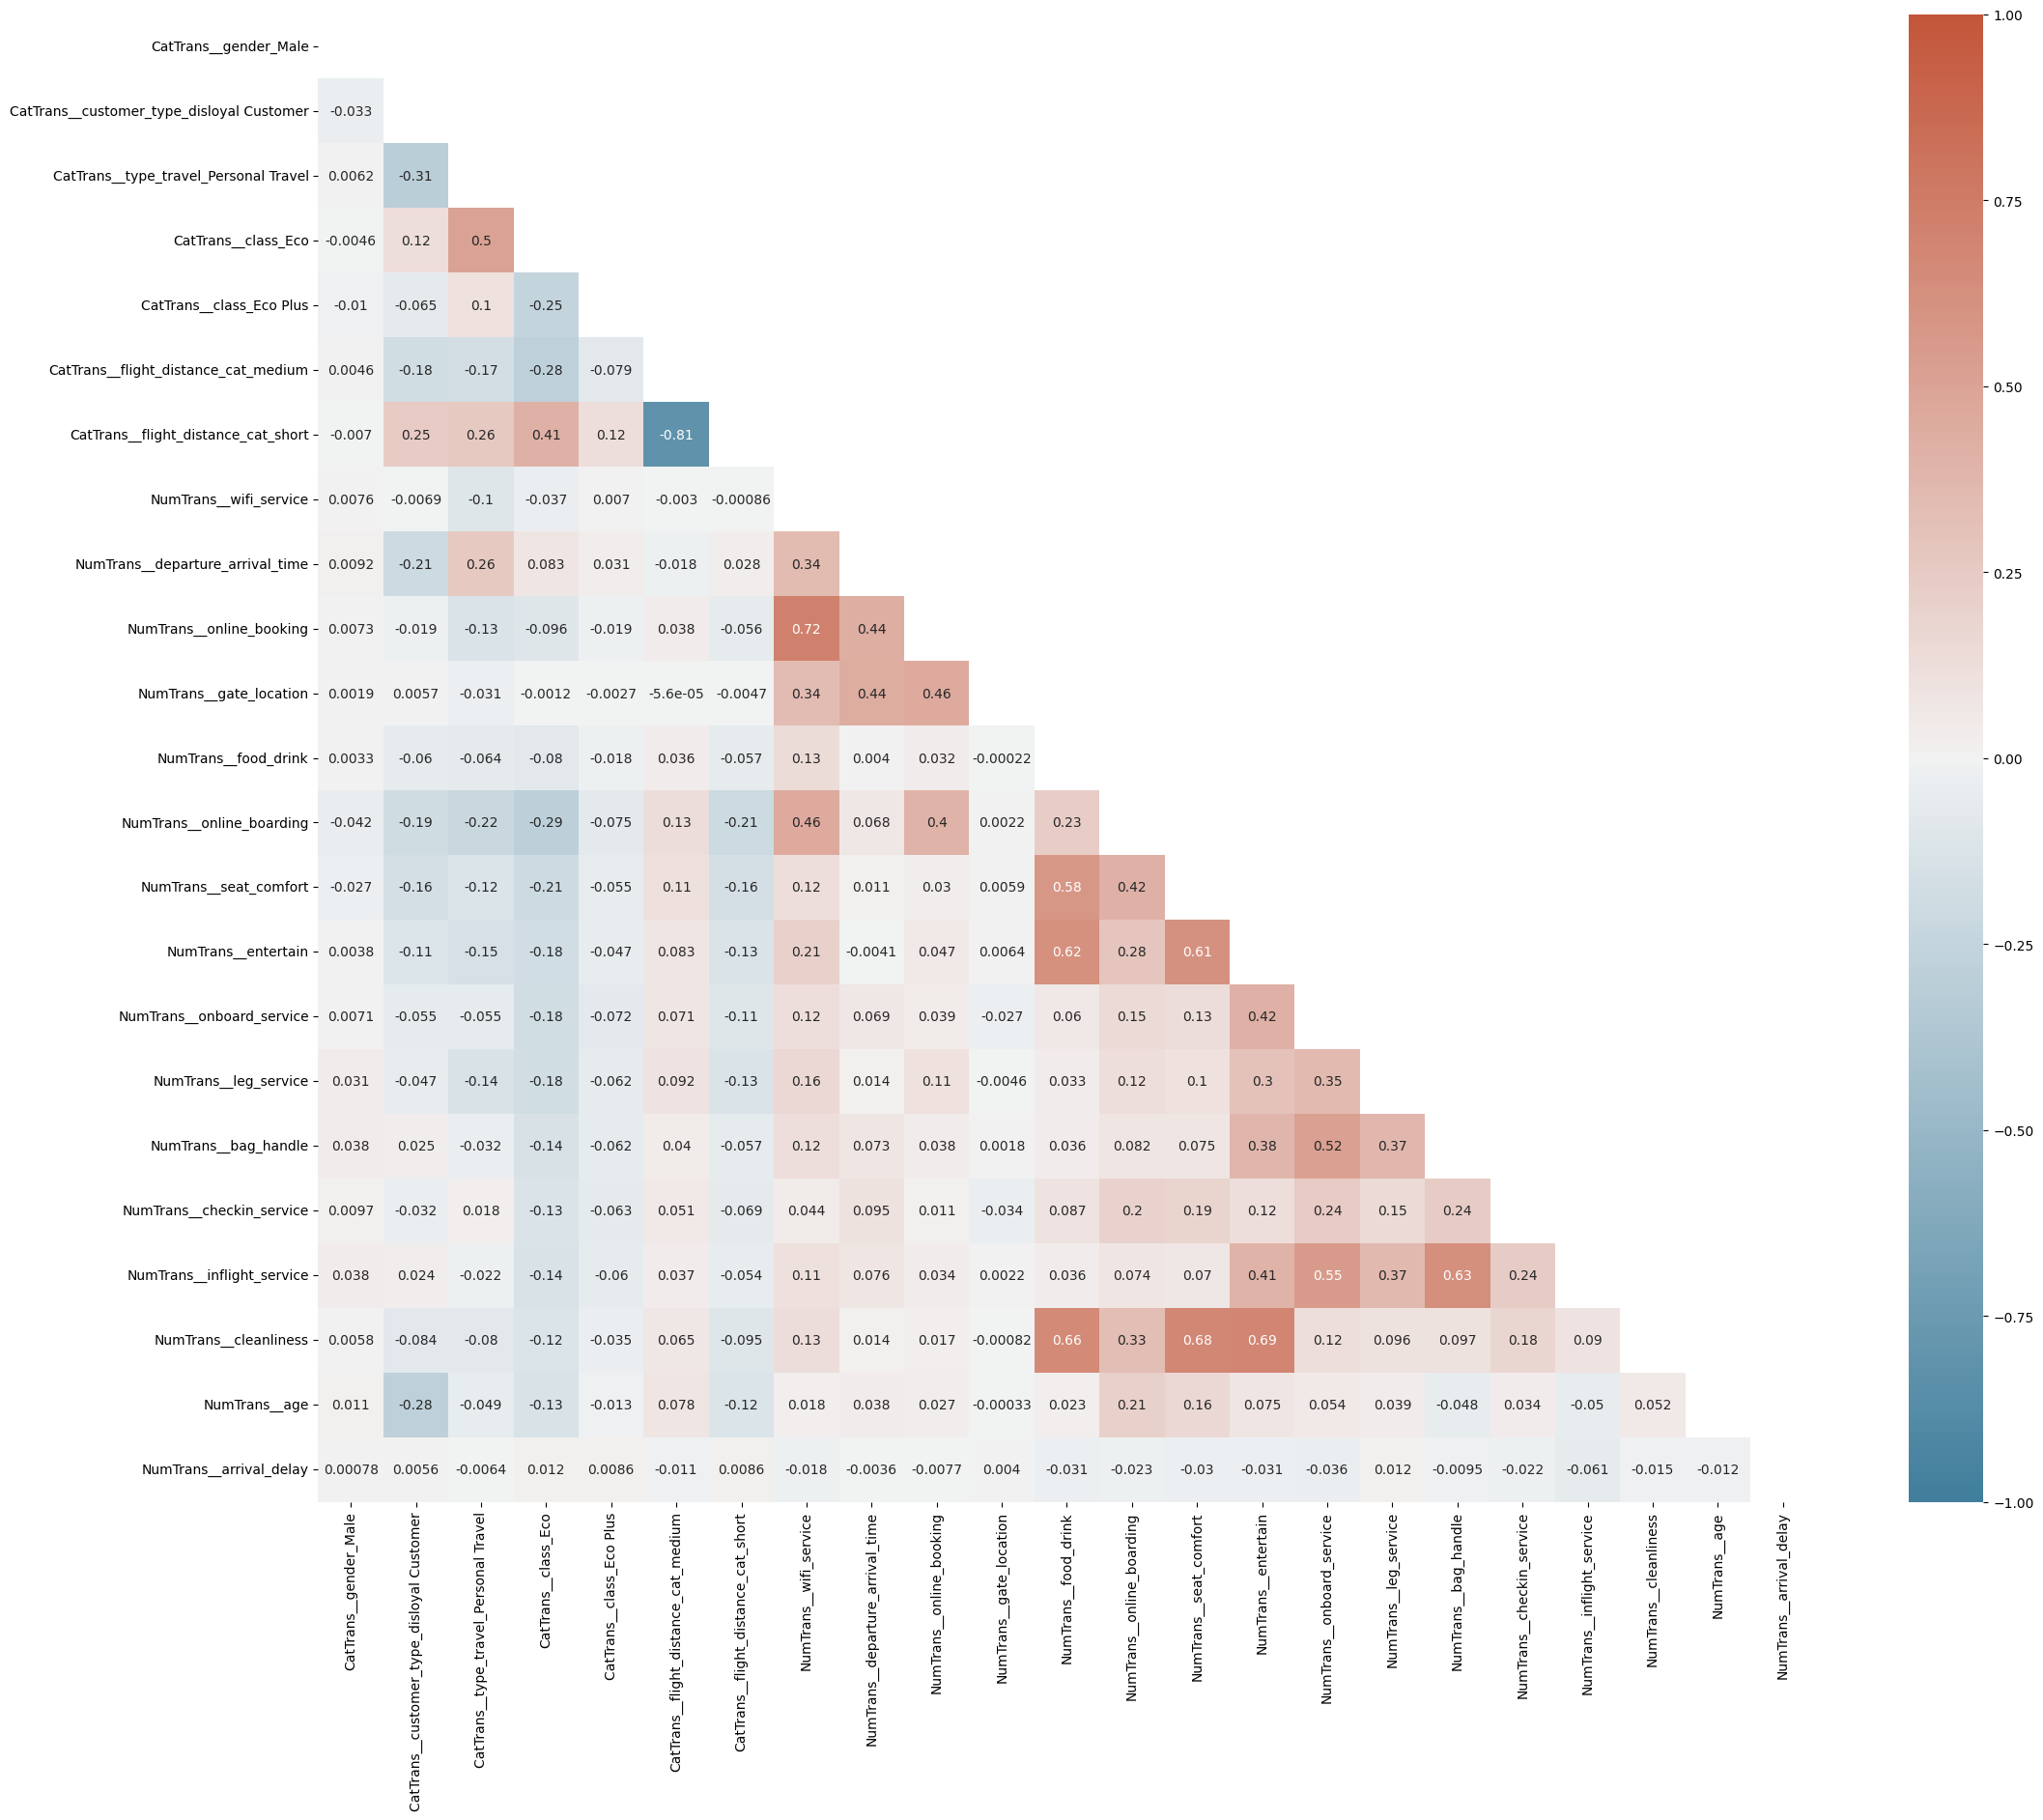

In [ ]:
X_train['satisfaction'] = y_train

printcorr(X_train)

In [ ]:
X_train.drop('satisfaction', axis = 1, inplace = True)

In [ ]:
combined_df = pd.concat([X_train, y_train], axis = 1)
combined_df.head()

,CatTrans__gender_Male,CatTrans__customer_type_disloyal Customer,CatTrans__type_travel_Personal Travel,CatTrans__class_Eco,CatTrans__class_Eco Plus,CatTrans__flight_distance_cat_medium,CatTrans__flight_distance_cat_short,NumTrans__wifi_service,NumTrans__departure_arrival_time,NumTrans__online_booking,...,NumTrans__entertain,NumTrans__onboard_service,NumTrans__leg_service,NumTrans__bag_handle,NumTrans__checkin_service,NumTrans__inflight_service,NumTrans__cleanliness,NumTrans__age,NumTrans__arrival_delay,satisfaction
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.4,1.0,0.4,...,0.6,1.0,1.0,0.75,0.8,0.8,0.6,0.269231,0.000000,neutral or dissatisfied
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.2,0.2,...,1.0,0.8,1.0,0.00,0.6,0.2,1.0,0.525641,0.001894,neutral or dissatisfied
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.4,1.0,0.4,...,0.6,1.0,0.8,0.75,1.0,1.0,0.6,0.192308,0.000000,satisfied
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.8,0.4,0.8,...,0.8,0.4,0.8,0.25,0.6,0.6,0.8,0.333333,0.009470,neutral or dissatisfied
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.4,0.4,0.4,...,0.6,0.8,0.6,0.75,0.6,0.6,0.6,0.410256,0.000000,satisfied


In [ ]:
X_train.shape

(88053, 23)

In [ ]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)

### Dividir el conjunto train en train y test

In [ ]:
#dividimos el conjunto de datos en entrenamiento (70%) y test(30%)
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

#mostramos el tamaño de los conjuntos de los grupos resultantes
print(f"Tamaño X_train_train: {X_train_train.shape}")
print(f"Tamaño X_train_test: {X_train_test.shape}")
print(f"Tamaño y_train_train: {y_train_train.shape}")
print(f"Tamaño y_train_test: {y_train_test.shape}")

Tamaño X_train_train: (70442, 23)
Tamaño X_train_test: (17611, 23)
Tamaño y_train_train: (70442,)
Tamaño y_train_test: (17611,)


### Funciones para entrenar y evaluar IA

In [ ]:
def prediction(model, data_to_predict):
    '''
    Esta función recibe el modelo que debe aplicarse y la matriz X (variables predictoras)
    Retorna la y que predice
    '''
    y_predicted = model.predict(data_to_predict)
    
    return y_predicted

In [ ]:
def test(y_predicted, y_true):
    '''
    Esta función calcula las métricas del modelo y las imprime    
    '''
    acc = accuracy_score(y_true, y_predicted)
    conf_matrix = confusion_matrix(y_true, y_predicted)
    precision = precision_score(y_true, y_predicted)
    recall = recall_score(y_true, y_predicted)
    f1 = f1_score(y_true, y_predicted)
    
    print(f"Exactitud (Accuracy): {acc}")
    print("Matriz de Confusión:")
    print(conf_matrix)
    print(f"Precisión: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

In [ ]:
def prediction_test(model, data_to_predict, y_true):
    '''
    Esta función agrupa las dos anteriores para hacer un sólo llamado
    '''
    y_predicted = prediction(model, data_to_predict)
    test(y_predicted, y_true)

In [ ]:
model = CatBoostClassifier(iterations=100, depth=6, loss_function='Logloss')
model.fit(X_train_train, y_train_train)


Learning rate set to 0.5
0:	learn: 0.2962357	total: 195ms	remaining: 19.3s
1:	learn: 0.2142229	total: 223ms	remaining: 10.9s
2:	learn: 0.1660077	total: 246ms	remaining: 7.97s
3:	learn: 0.1448234	total: 267ms	remaining: 6.41s
4:	learn: 0.1350775	total: 291ms	remaining: 5.54s
5:	learn: 0.1296888	total: 316ms	remaining: 4.96s
6:	learn: 0.1252948	total: 338ms	remaining: 4.49s
7:	learn: 0.1228035	total: 360ms	remaining: 4.14s
8:	learn: 0.1200858	total: 384ms	remaining: 3.88s
9:	learn: 0.1158846	total: 411ms	remaining: 3.7s
10:	learn: 0.1128095	total: 437ms	remaining: 3.53s
11:	learn: 0.1098276	total: 462ms	remaining: 3.39s
12:	learn: 0.1088702	total: 485ms	remaining: 3.25s
13:	learn: 0.1080602	total: 508ms	remaining: 3.12s
14:	learn: 0.1070108	total: 533ms	remaining: 3.02s
15:	learn: 0.1054830	total: 561ms	remaining: 2.94s
16:	learn: 0.1032440	total: 583ms	remaining: 2.84s
17:	learn: 0.1016760	total: 606ms	remaining: 2.76s
18:	learn: 0.0990892	total: 632ms	remaining: 2.69s
19:	learn: 0.0978

27:	learn: 0.0923494	total: 860ms	remaining: 2.21s
28:	learn: 0.0915607	total: 889ms	remaining: 2.17s
29:	learn: 0.0903987	total: 932ms	remaining: 2.17s
30:	learn: 0.0892109	total: 960ms	remaining: 2.14s
31:	learn: 0.0885111	total: 988ms	remaining: 2.1s
32:	learn: 0.0878321	total: 1.02s	remaining: 2.06s
33:	learn: 0.0875224	total: 1.08s	remaining: 2.11s
34:	learn: 0.0868784	total: 1.11s	remaining: 2.07s
35:	learn: 0.0856997	total: 1.15s	remaining: 2.04s
36:	learn: 0.0852627	total: 1.18s	remaining: 2s
37:	learn: 0.0843334	total: 1.21s	remaining: 1.97s
38:	learn: 0.0840040	total: 1.24s	remaining: 1.93s
39:	learn: 0.0838472	total: 1.27s	remaining: 1.9s
40:	learn: 0.0835929	total: 1.3s	remaining: 1.87s
41:	learn: 0.0831662	total: 1.33s	remaining: 1.84s
42:	learn: 0.0826879	total: 1.36s	remaining: 1.81s
43:	learn: 0.0823377	total: 1.39s	remaining: 1.77s
44:	learn: 0.0813317	total: 1.42s	remaining: 1.74s
45:	learn: 0.0804490	total: 1.45s	remaining: 1.7s
46:	learn: 0.0797671	total: 1.48s	rema

In [ ]:
print("Datos de Entrenamiento:")
prediction_test(model, X_train_train, y_train_train)

Datos de Entrenamiento:


Exactitud (Accuracy): 0.9732262002782431
Matriz de Confusión:
[[39395   611]
 [ 1275 29161]]
Precisión: 0.9794773612790542
Recall: 0.9581088185044027
F1-Score: 0.9686752591017805


In [ ]:
print("Datos de Prueba:")
prediction_test(model, X_train_test, y_train_test)

Datos de Prueba:
Exactitud (Accuracy): 0.9613877690080064
Matriz de Confusión:
[[9736  239]
 [ 441 7195]]
Precisión: 0.9678504170029594
Recall: 0.9422472498690414
F1-Score: 0.9548772395487725


### Ajuste de hiperparámetros

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    "learning_rate":[0.005, 1e-3, 1e-4],
    "n_estimators": [100,200,300,400],
    "subsample": np.arange(0.1,1.0,0.2),
    "max_depth": np.arange(3,8,1),
}

gs = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, scoring="accuracy", n_jobs=-1, verbose=2, n_iter=10)
gs.fit(X_train_train,y_train_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
best_params = gs.best_params_

: 

In [ ]:
model = GradientBoostingClassifier(**best_params)
model.fit(X_train_train, y_train_train)

: 

In [ ]:
print("Datos de Prueba:")
prediction_test(model, X_train_test, y_train_test)

: 

In [ ]:
#rand_est = RandomizedSearchCV(model, parameters, n_iter = 20, cv = 6, scoring = 'accuracy').fit(X_train, y_train)

: 

### Validación cruzada

### Modelo IA con todo el conjunto de datos disponibles

### Gráfica: características más importantes

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=29b03316-cf38-4365-8907-31706818d5ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>